<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5505MachineLearning/blob/main/LogisticRegressionAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the libraries
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


**Loading the Dataset:**

---



In [3]:
# Loading the dataset
wine_df = pd.read_csv('/content/winequality-red.csv')
wine_df.shape  # Shaping the dataset
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Data Visualization for the raw data.**

---



Text(0.5, 0, 'Wine Quality')

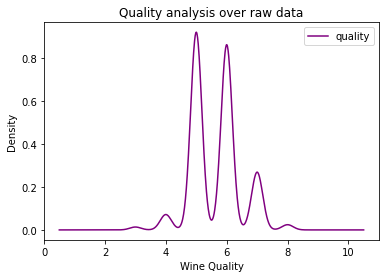

In [23]:
# Plotting wine quality density graph for the raw data for visualization purpose
plotdata = pd.DataFrame({"quality": wine_df['quality'].values.tolist()})
plotdata.plot(kind="kde",color='purple')
plt.title("Quality analysis over raw data")
plt.xlabel("Wine Quality")

**Defining Correlation matrix of the variables:**

---



In [4]:
# Calling corr function to find the correlation of a dataframe. 
wine_correlation = wine_df.corr() # Defines linear relationship between variables.
wine_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Data visualisation of the correlation matrix using heatmap:**

---



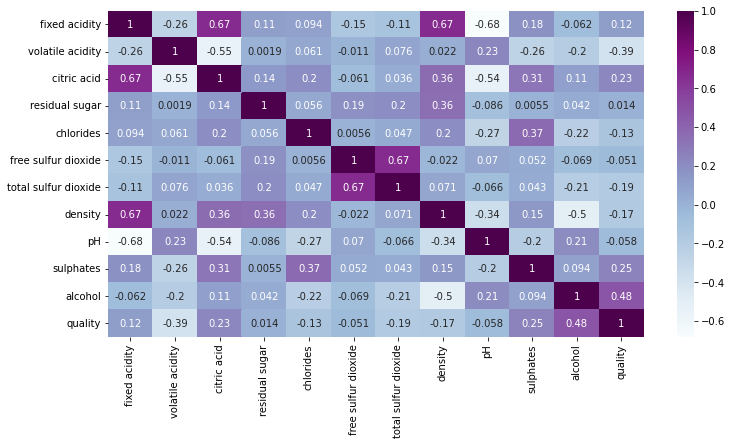

In [ ]:
# Drawing heatmap for visualising correlation which explains linear relation of the features
plt.figure(figsize = (12,6))
sns.heatmap(wine_correlation, cmap="BuPu",annot=True )
plt.show()


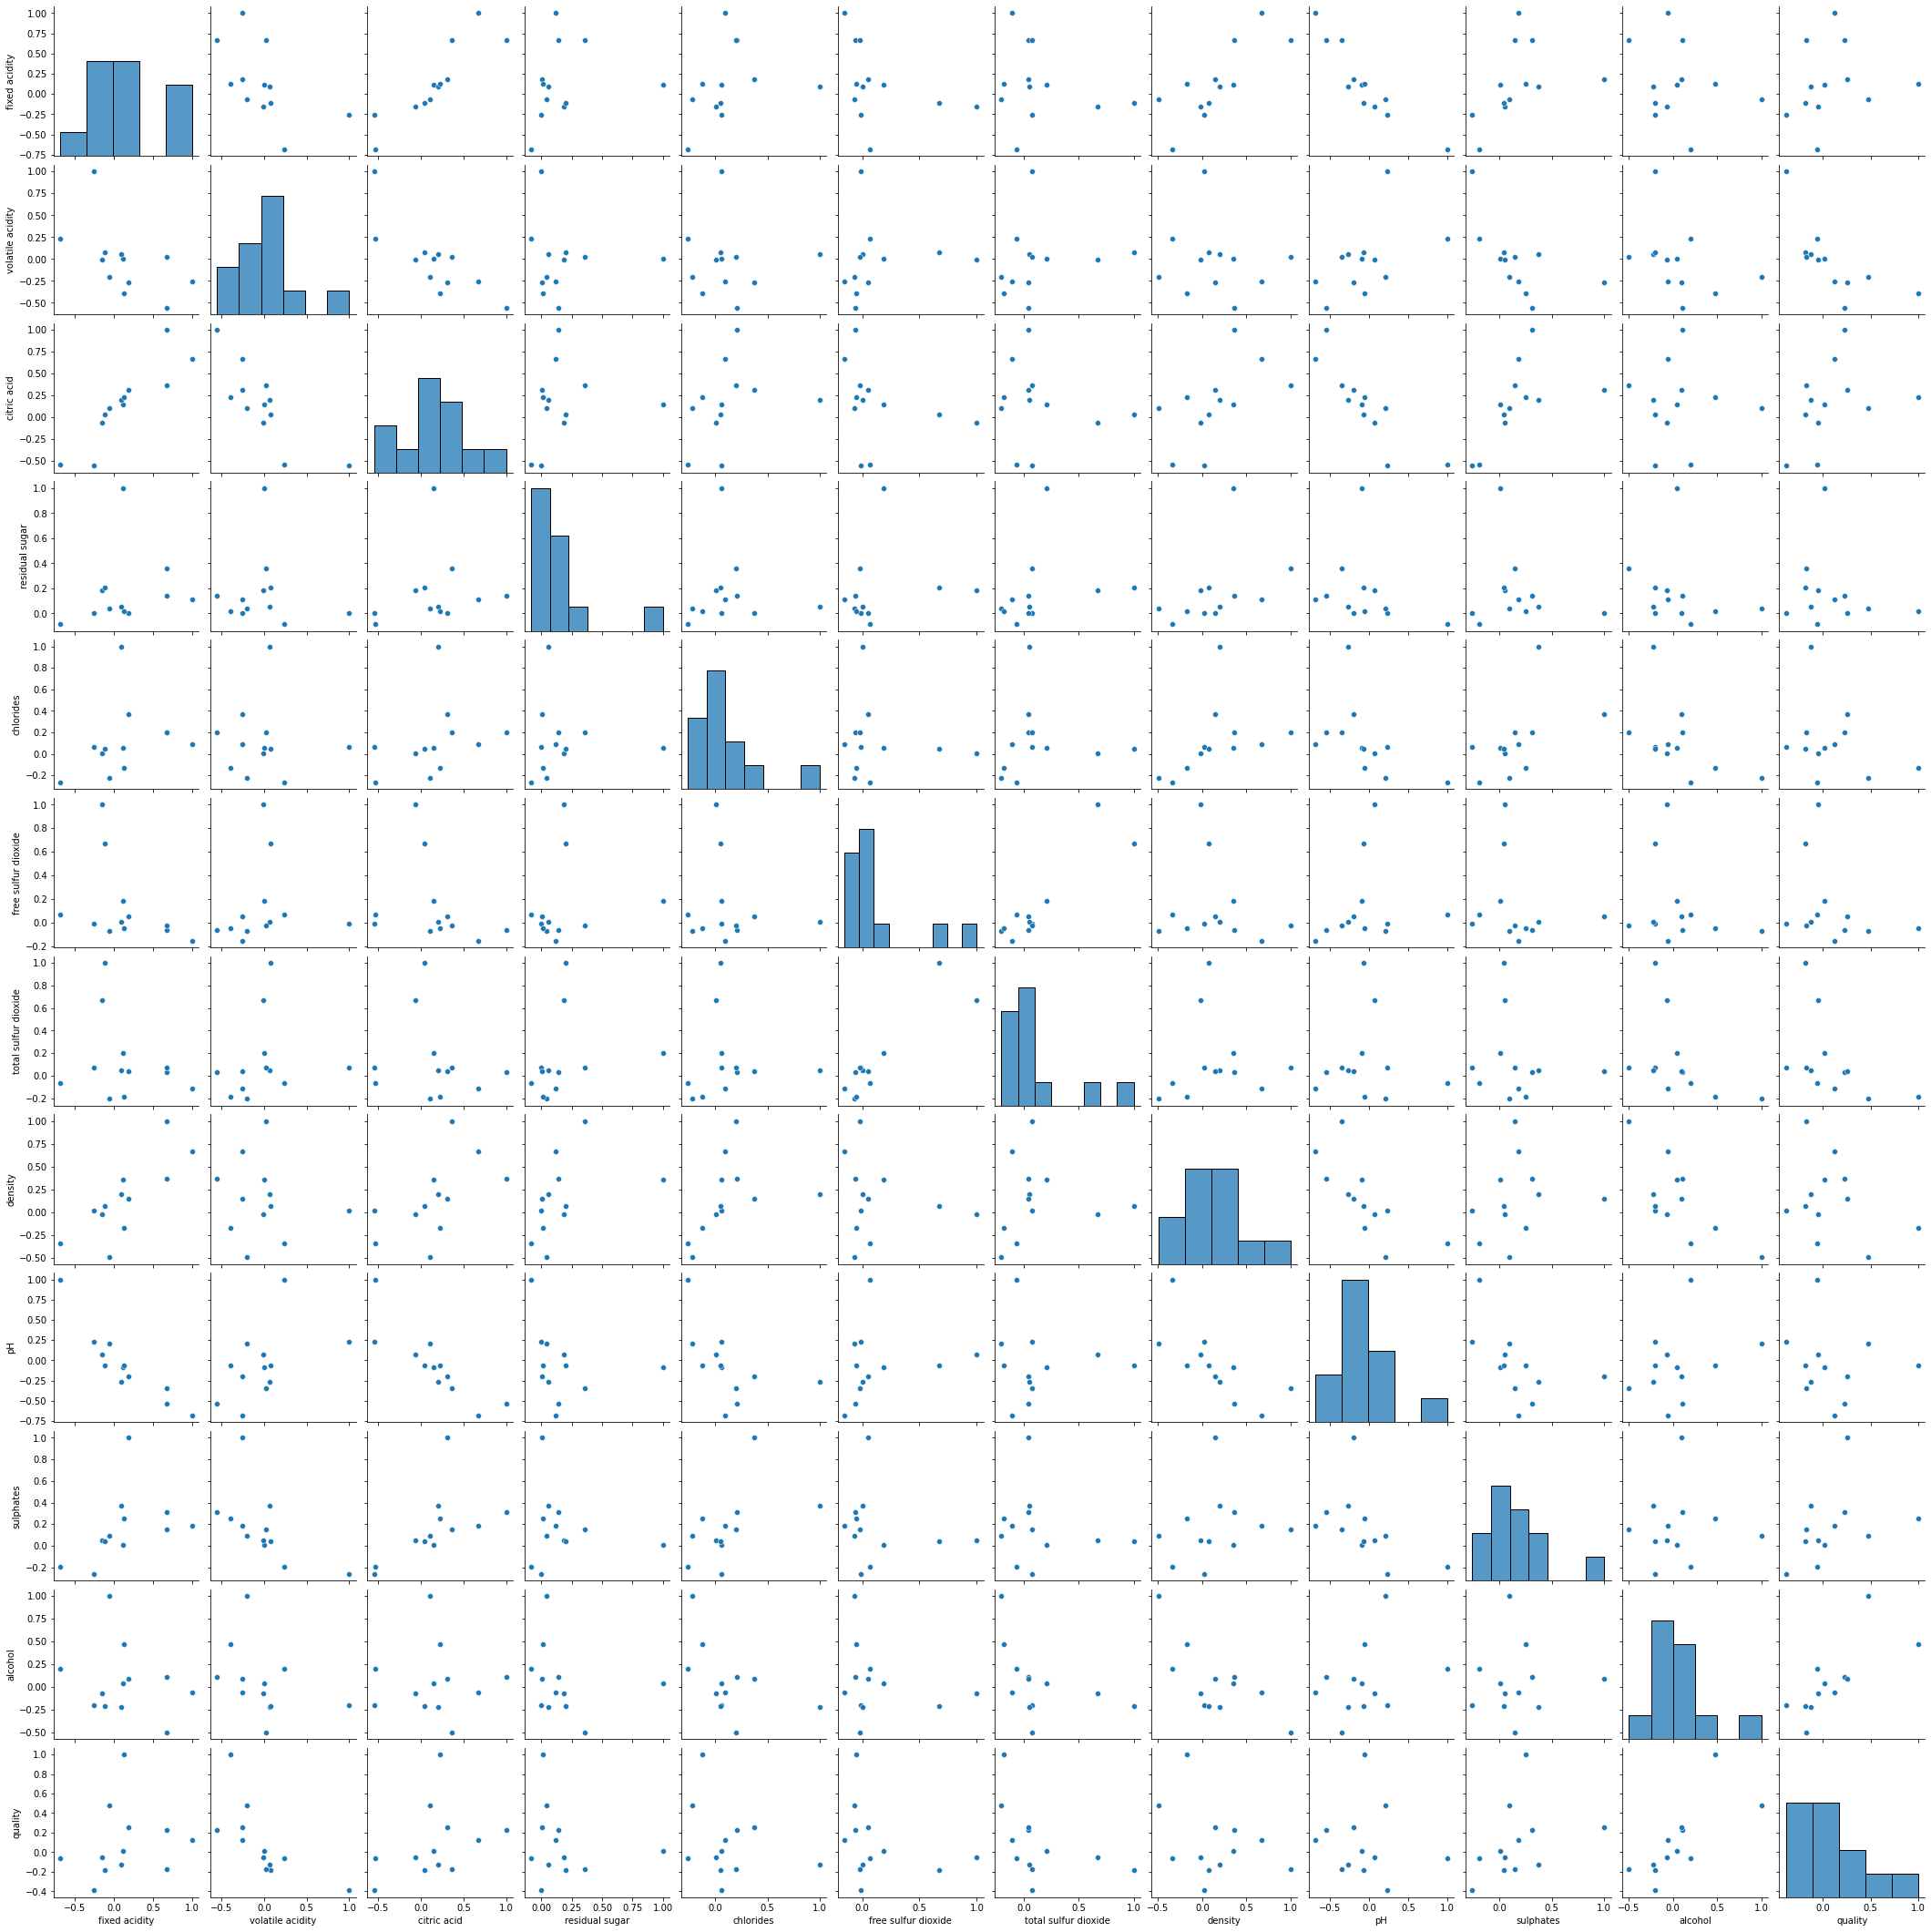

In [31]:
sns.pairplot(wine_correlation,kind='scatter',palette='Dark2')

**Data Segregation:**

---
Data is segregated in to x - independent variables and y - dependent variable


In [ ]:
X = wine_df.iloc[:, :-1]
col = X.columns
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
Y = wine_df.iloc[:,-1:]
Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


**Data Splitting:**

---

Data is splitted into 80 percent traning data and 20 percent test data.

In [ ]:
in_train, in_test, out_train, out_test = train_test_split(X,Y,test_size=0.2, random_state=0)

**Model Building through training the training data:**

---



In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(in_train, out_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Model Prediction:**

---



In [ ]:
predictions = logistic_model.predict(in_test)
predictions

array([6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6,
       7, 7, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

**Calculting accuracies:**

---

I had imported sklearn.metrics libary and calculated accuracies using accuracy_score function.

In [ ]:
predicted_accuracy=accuracy_score(out_test, predictions)
actual_accuracy= logistic_model.score(in_test, out_test)

print("Accuracy calculated through predicted values: ",predicted_accuracy)
print("Accuracy calculated through test data: ",actual_accuracy)

Accuracy calculated through predicted values:  0.625
Accuracy calculated through test data:  0.625


In [ ]:
logistic_model.predict_proba(in_test)

array([[2.72289948e-05, 9.44278472e-03, 2.88540183e-01, 5.29435828e-01,
        1.71281343e-01, 1.27263132e-03],
       [5.80925851e-03, 6.59337380e-02, 6.30825123e-01, 2.46476120e-01,
        4.34931605e-02, 7.46259944e-03],
       [1.91702482e-03, 2.39377350e-02, 6.73829507e-02, 5.74081160e-01,
        3.23016511e-01, 9.66461766e-03],
       ...,
       [4.06739828e-03, 2.85574320e-02, 8.49885872e-02, 5.52467109e-01,
        3.17733033e-01, 1.21864406e-02],
       [2.21421968e-03, 2.91177460e-02, 6.31746087e-01, 2.84656095e-01,
        4.57708961e-02, 6.49495637e-03],
       [5.37619741e-03, 3.88899317e-02, 3.29886289e-02, 4.87092839e-01,
        4.07234697e-01, 2.84177066e-02]])

**Feature Scaling:**

---

This is implemented for both Standarsing and Normlizing procedures.

**Standardising the features:**

---
standardization of features is extremely important to minimize multicollinearity. When there exist the higher order terms if we do not standardize we might miss out statistically significant results and producing misleading results.


In [ ]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
in_std = standardization.fit_transform(X)
in_std = pd.DataFrame(in_std, columns = col)
in_std.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


**Data Splitting after Standarzing:**

---
After standardising the features, data is split into 80:20 percent then calculated predicted values after model fitting.


In [ ]:
in_train, in_test, out_train, out_test = train_test_split(in_std, Y, test_size = 0.2, random_state = 45)

**Predicting values after standarsing the features:**

---



In [ ]:
logistic_model.fit(in_train, out_train)
out_pred = logistic_model.predict(in_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Identifying and validating accuracies after predicting values.**

---



In [ ]:
cal_acc = logistic_model.score(in_test, out_test)
print('Accuracy of the model after standardizing features over the test data:',cal_acc)

Accuracy of the model after standardizing features over the test data: 0.6375


**Normalizing the features:**

---



The primary purpose of feature normalization is to bring all the variables to the same range. This is achieved by modifying the values of numeric columns of the dataset to a common scale by transforming values in variables between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalization = MinMaxScaler()
in_norm = normalization.fit_transform(X)
in_norm = pd.DataFrame(in_norm, columns = col)
in_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


**Data splitting after Normalizing:**

---


After normalizing features, data is split into 80:20 percent then calculated predicted values after model fitting.

In [ ]:
in_train, in_test, out_train, out_test = train_test_split(in_norm, Y, test_size = 0.2, random_state = 45)

**Predicting values after normalising the features:**

---



In [ ]:
logistic_model.fit(in_train,out_train)
out_pred = logistic_model.predict(in_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Identifying and validating accuracies after predicting values:**

---



In [ ]:
norm_accuracy=logistic_model.score(in_test, out_test)
print('Accuracy of the model after normalising features over the test data:', norm_accuracy)

Accuracy of the model after normalising features over the test data: 0.64375
